In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [14]:
conn = sqlite3.connect('/Users/trsaivarun/Downloads/NLP_password_resources/password_data.sqlite')

In [15]:
data = pd.read_sql_query('select * from Users',conn)

In [16]:
data.shape

(100000, 3)

In [17]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


## data cleaning

In [18]:
data.dtypes

index        int64
password    object
strength     int64
dtype: object

In [21]:
data = data.drop('index',axis=1)

In [23]:
data.dtypes

password    object
strength     int64
dtype: object

In [24]:
data.isna().sum()

password    0
strength    0
dtype: int64

In [27]:
data.duplicated().sum()

0

In [28]:
data['strength'].unique()

array([1, 2, 0])

## data analysis - semantic analysis

1. How many are numeric only?
2. How many are uppercase only?
3. How many hold alphanumeric?
4. How many have title-case?
5. How many have some special characters?

In [32]:
data[data['password'].str.isnumeric()].count()

password    26
strength    26
dtype: int64

In [37]:
data[data['password'].str.isupper()].count()

password    1506
strength    1506
dtype: int64

In [39]:
data[data['password'].str.isalnum()].count()

password    97203
strength    97203
dtype: int64

In [40]:
data[data['password'].str.istitle()].count()

password    932
strength    932
dtype: int64

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
def spl_checker(rows):
    for letter in rows:
        if letter in string.punctuation:
            return 1
        else:
             pass

In [61]:
data[data['password'].apply(spl_checker)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [63]:
data['p_length']=data['password'].str.len()

In [64]:
data.head()

,password,strength,p_length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


In [86]:
text = 'Shan99'
text

'Shan99'

In [87]:
mychar=[]
for letter in text:
    if letter.islower():
        mychar.append(letter)
mychar

['h', 'a', 'n']

In [88]:
len(mychar)

3

In [89]:
len(mychar)/len(text)

0.5

In [119]:

def freq_lower(text):
    mychar=[]
    for letter in text:
        if letter.islower():
            mychar.append(letter)
    return len(mychar)/len(text)

def freq_upper(text):
    mychar=[]
    for letter in text:
        if letter.isupper():
            mychar.append(letter)
    return len(mychar)/len(text)

def freq_digit(text):
    mychar=[]
    for letter in text:
        if letter.isdigit():
            mychar.append(letter)
    return len(mychar)/len(text)


def freq_special(text):
    mychar=[]
    for letter in text:
        if not letter.isalpha() and not letter.isdigit():
            mychar.append(letter)
    return len(mychar)



In [126]:
data['Freq_lower']=np.round(data['password'].apply(freq_lower),2)
data['Freq_upper']=np.round(data['password'].apply(freq_upper),2)
data['Freq_digit']=np.round(data['password'].apply(freq_digit),2)
data['Freq_special']=np.round(data['password'].apply(freq_special),2)

In [127]:
data.head()

,password,strength,p_length,Freq_lower,Freq_upper,Freq_digit,Freq_special
0,zxe870819,1,9,0.33,0.0,0.67,0
1,xw46454nr23l,1,12,0.42,0.0,0.58,0
2,soporte13,1,9,0.78,0.0,0.22,0
3,accounts6000webhost.com,2,23,0.78,0.0,0.17,1
4,c443balg,1,8,0.62,0.0,0.38,0


In [136]:
data[['p_length','strength']].groupby('strength').agg(['min','max','mean','median'])



p_length                       
              min  max       mean median
strength                                
0               1    7   6.550947    7.0
1               8   13   9.611074    9.0
2              14  220  15.953421   16.0

In [140]:
data.columns

Index(['password', 'strength', 'p_length', 'Freq_lower', 'Freq_upper',
       'Freq_digit', 'Freq_special'],
      dtype='object')

In [158]:
cols=[ 'p_length' ,'Freq_lower', 'Freq_upper',
       'Freq_digit', 'Freq_special']

for col in cols:
    print(data[[col, 'strength']].groupby('strength').agg(['min', 'max', 'mean', 'median']))


         p_length                       
              min  max       mean median
strength                                
0               1    7   6.550947    7.0
1               8   13   9.611074    9.0
2              14  220  15.953421   16.0
         Freq_lower                       
                min   max      mean median
strength                                  
0               0.0  1.00  0.707861   0.71
1               0.0  0.92  0.630550   0.67
2               0.0  0.92  0.425160   0.40
         Freq_upper                       
                min   max      mean median
strength                                  
0               0.0  1.00  0.012858   0.00
1               0.0  0.92  0.007917   0.00
2               0.0  0.89  0.367897   0.43
         Freq_digit                       
                min   max      mean median
strength                                  
0               0.0  1.00  0.275598   0.29
1               0.0  0.92  0.359650   0.33
2               0.0  0.

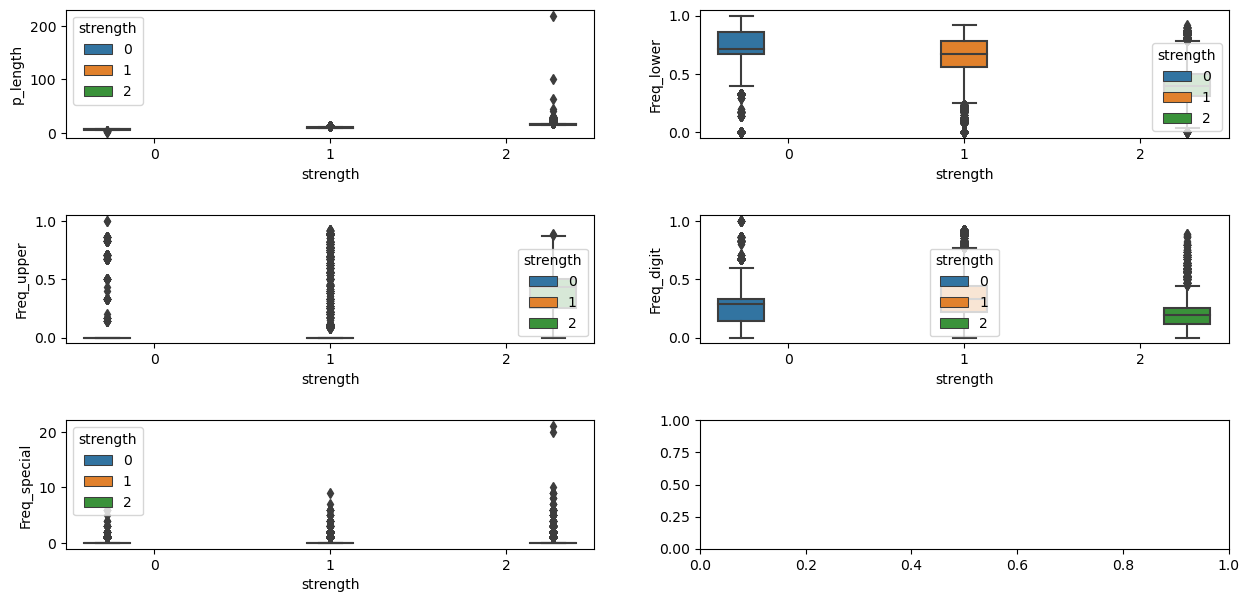

In [161]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='p_length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='Freq_lower' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='Freq_upper' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='Freq_digit' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='Freq_special' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)